# Multi-class Image Classification

1. Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different hyperparamenters and improve the model
7. Repeat


## 1. Import and become one with the data

In [55]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2023-08-18 11:33:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.120.128, 142.251.161.128, 142.251.171.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  77.5MB/s    in 7.9s    

2023-08-18 11:33:09 (62.3 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [56]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} .')

There are 2 directories and 0 images in 10_food_classes_all_data .
There are 10 directories and 0 images in 10_food_classes_all_data/train .
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen .
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry .
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza .
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream .
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon .
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak .
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings .
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger .
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi .
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice .
There are 1

In [57]:
#  Setup the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [58]:
# Get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [59]:
# Create a function to view images
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  """
  Plot a random image
  """
  # Setup the target directory ()we'll view images from here
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')

  return img

Image shape: (512, 511, 3)


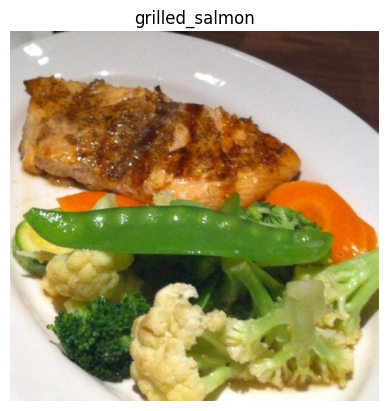

In [60]:
# Visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2.Preprocessing the data

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale images
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

### 4. Fit the model

In [63]:
# Fit the model
history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 37s 134ms/step - loss: 2.1612 - accuracy: 0.2124 - val_loss: 1.9892 - val_accuracy: 0.2884
Epoch 2/5
235/235 [==============================] - 32s 137ms/step - loss: 1.9587 - accuracy: 0.3149 - val_loss: 1.9629 - val_accuracy: 0.3000
Epoch 3/5
235/235 [==============================] - 30s 126ms/step - loss: 1.7655 - accuracy: 0.3917 - val_loss: 1.9028 - val_accuracy: 0.3408
Epoch 4/5
235/235 [==============================] - 27s 116ms/step - loss: 1.4087 - accuracy: 0.5381 - val_loss: 2.0685 - val_accuracy: 0.2912
Epoch 5/5
235/235 [==============================] - 28s 120ms/step - loss: 0.8651 - accuracy: 0.7165 - val_loss: 2.5776 - val_accuracy: 0.2860


### 5. Evaluate the model

In [64]:
# Evaluate on the test data
model.evaluate(test_data)

79/79 [==============================] - 7s 83ms/step - loss: 2.5776 - accuracy: 0.2860


[2.577632188796997, 0.28600001335144043]

In [65]:
# Check out the model loss curves
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """

  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) # How many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

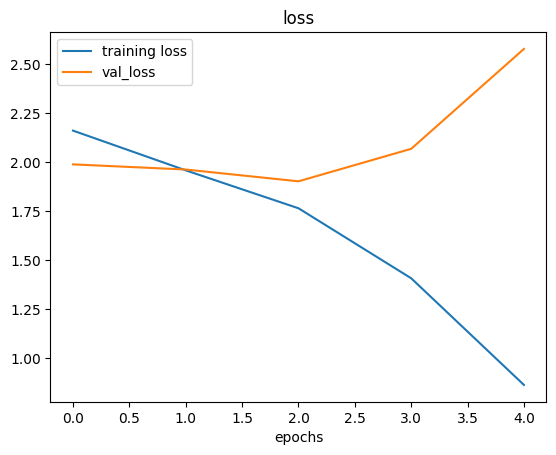

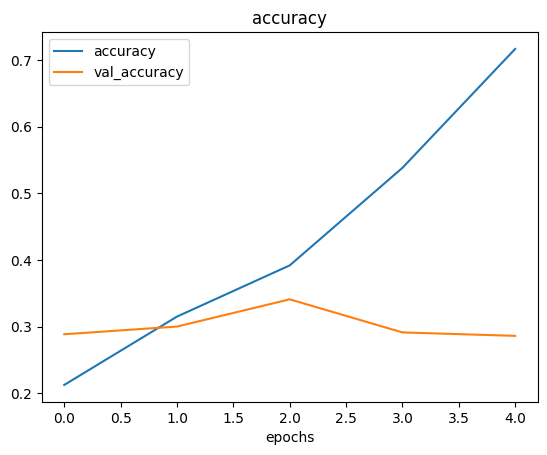

In [66]:
plot_loss_curves(history)

The model is overfitting

### 6. Adjust different hyperparameters

Fix:
* Get more data
* Simplify the mode
* Use data augmentation



In [67]:
# Simplify the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [68]:
# Create the model (-2 Con2D layers)
model_2 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [69]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=(0.25 * len(test_data)))

Epoch 1/5
235/235 [==============================] - 24s 96ms/step - loss: 2.1620 - accuracy: 0.2179 - val_loss: 1.9470 - val_accuracy: 0.2984
Epoch 2/5
235/235 [==============================] - 22s 95ms/step - loss: 1.8635 - accuracy: 0.3559 - val_loss: 1.9352 - val_accuracy: 0.2781
Epoch 3/5
235/235 [==============================] - 21s 91ms/step - loss: 1.6206 - accuracy: 0.4545 - val_loss: 1.8804 - val_accuracy: 0.3406
Epoch 4/5
235/235 [==============================] - 23s 98ms/step - loss: 1.2954 - accuracy: 0.5725 - val_loss: 2.0271 - val_accuracy: 0.3250
Epoch 5/5
235/235 [==============================] - 23s 98ms/step - loss: 0.8783 - accuracy: 0.7291 - val_loss: 2.3899 - val_accuracy: 0.3016


In [ ]:
# Check the loss curves
plot_loss_curves(history_2)

In [ ]:
model.summary()

In [ ]:
model_2.summary()

Simplify the model do not work, let's try with data augmentation

In [ ]:
# Augmented data

# Load data in from directories
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

In [ ]:
# Create model
model_3 = tf.keras.models.clone_model(model) # Clone a previous model architecture

# Compile
model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model.summary()

In [76]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [77]:
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 101s 422ms/step - loss: 2.1650 - accuracy: 0.2164 - val_loss: 2.0054 - val_accuracy: 0.2816
Epoch 2/5
235/235 [==============================] - 99s 420ms/step - loss: 2.0514 - accuracy: 0.2757 - val_loss: 1.9054 - val_accuracy: 0.3300
Epoch 3/5
235/235 [==============================] - 100s 427ms/step - loss: 2.0075 - accuracy: 0.2939 - val_loss: 1.8733 - val_accuracy: 0.3492
Epoch 4/5
235/235 [==============================] - 99s 422ms/step - loss: 1.9716 - accuracy: 0.3043 - val_loss: 1.8850 - val_accuracy: 0.3412
Epoch 5/5
235/235 [==============================] - 100s 425ms/step - loss: 1.9369 - accuracy: 0.3284 - val_loss: 1.7846 - val_accuracy: 0.3992


In [ ]:
model.evaluate(test_data)

In [ ]:
model_3.evaluate(test_data)

In [ ]:
# plot model_3 lost curves
plot_loss_curves(history_3)

### Making a prediction with our trained data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots
  the image with the predictd class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Predicition: {pred_class}')
  plt.axis(False);

In [ ]:
# Make a pred
pred_and_plot(model=model_3,
              filename='03-pizza-dad.jpeg',
              class_names=class_names)

In [ ]:
pred_and_plot(model=model_3,
              filename='03-steak.jpeg',
              class_names=class_names)

1/1 [==============================] - 0s 21ms/step


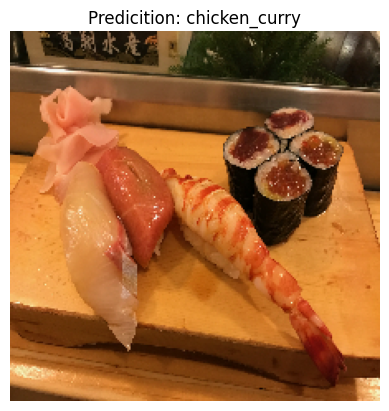

In [86]:
pred_and_plot(model=model_3,
              filename='03-sushi.jpeg',
              class_names=class_names)

In [ ]:
pred_and_plot(model=model_3,
              filename='03-hamburger.jpeg',
              class_names=class_names)

### Saving and loading our model

In [ ]:
model_3.save('saved_trained_model_3')

In [90]:
loaded_model = tf.keras.models.load_model('saved_trained_model_3')
loaded_model.evaluate(test_data)

OSError: ignored

In [91]:
 model_3.evaluate(test_data)

79/79 [==============================] - 8s 103ms/step - loss: 1.7846 - accuracy: 0.3992


[1.7845501899719238, 0.3991999924182892]